In [1]:
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import nltk
from nltk.corpus import stopwords
import time
from datetime import datetime 
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB

first_time = datetime.now() 

### 8

In [2]:
categories = ['talk.politics.misc', 'talk.religion.misc', 'comp.graphics', 'sci.space']

newsgroups_train = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
#newsgroups_test = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

df = pd.DataFrame(data={'text': list(newsgroups_train.data) ,'label': list(newsgroups_train.target) })

In [3]:
#data cleaning

stop_words = set(stopwords.words('english'))
df['text'] = df['text'].str.lower()
df['text'] = df['text'].str.replace('[^\w\s]','') 
df['text'] = df['text'].str.replace('[^a-z ]','') 
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

In [4]:
X = df['text']
y = df['label']

first_cos_time = datetime.now() 
#TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y)
vectorizer = TfidfVectorizer(stop_words='english')
X_train_dtm = vectorizer.fit_transform(X_train)
X_test_dtm = vectorizer.transform(X_test)

first_cos_time_final = datetime.now() - first_cos_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_cos_time_final))

Time elapsed in (hh:mm:ss.ms): "0:00:00.572697"


In [5]:
# from sklearn.linear_model import LogisticRegression
# clf_lr = LogisticRegression()
# clf_lr.fit(X_train_dtm, y_train)
# y_pred = clf_lr.predict(X_test_dtm)
# lr_score = accuracy_score(y_test, y_pred) # perfectly balanced binary classes
# print(lr_score)

In [6]:
###8
###i


# ComplementNB standard multinomial naive Bayes (MNB) algorithm 
time1 = datetime.now() 

clf = ComplementNB()
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)
comp_score = accuracy_score(y_test, y_pred)
print(comp_score)
time1 = datetime.now() - time1
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time1))



time2 = datetime.now() 
# MultinomialNB naive Bayes algorithm for multinomially distributed data

clf_mnb = MultinomialNB()
clf_mnb.fit(X_train_dtm, y_train)
y_pred = clf_mnb.predict(X_test_dtm)
mnb_score = accuracy_score(y_test, y_pred)
print(mnb_score)
time2 = datetime.now() - time2
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time2))

0.8656361474435196
Time elapsed in (hh:mm:ss.ms): "0:00:00.015996"
0.8228299643281808
Time elapsed in (hh:mm:ss.ms): "0:00:00.011994"


In [7]:
###8
###ii

time3 = datetime.now() 
# BernoulliNB multivariate Bernoulli distributions


clf = BernoulliNB()
clf.fit(X_train_dtm, y_train)
y_pred = clf.predict(X_test_dtm)
bern_score = accuracy_score(y_test, y_pred)
print(bern_score)
time3 = datetime.now() - time3
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time3))



time4 = datetime.now() 
# Gaussian Naive Bayes algorithm for classification

gausnb = GaussianNB()
gausnb.fit(X_train_dtm.toarray(), y_train)
y_pred = gausnb.predict(X_test_dtm.toarray())
gausnb_score = accuracy_score(y_test, y_pred)
print(gausnb_score)
time4 = datetime.now() - time4
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(time4))

0.6587395957193817
Time elapsed in (hh:mm:ss.ms): "0:00:00.029363"
0.7895362663495838
Time elapsed in (hh:mm:ss.ms): "0:00:04.943860"


### Execution time

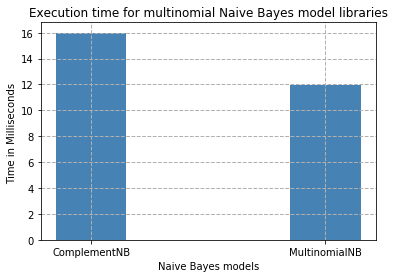

In [8]:
l = [time1.microseconds/1000,time2.microseconds/1000]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Naive Bayes models')
plt.ylabel('Time in Milliseconds ')
plt.xticks([1,2],['ComplementNB','MultinomialNB'])
plt.title('Execution time for multinomial Naive Bayes model libraries')
plt.yticks()
plt.style.use('default')
plt.show()

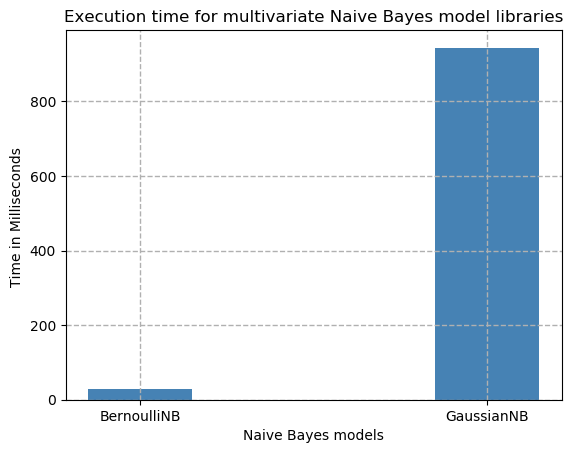

In [9]:
l = [time3.microseconds/1000,time4.microseconds/1000]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Naive Bayes models')
plt.ylabel('Time in Milliseconds ')
plt.xticks([1,2],['BernoulliNB','GaussianNB'])
plt.title('Execution time for multivariate Naive Bayes model libraries')
plt.yticks()
plt.style.use('default')
plt.show()

### Accuracy score

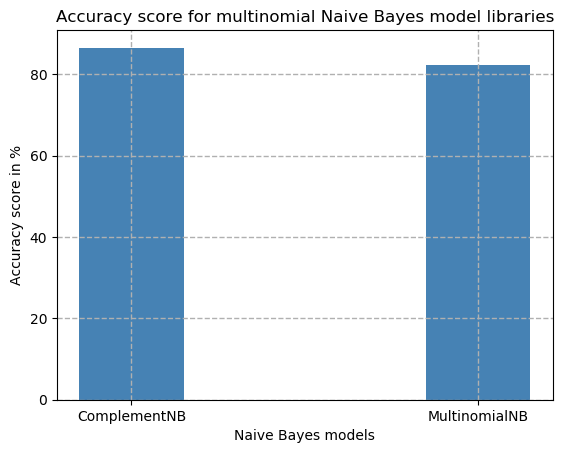

In [10]:
l = [comp_score*100,mnb_score*100]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Naive Bayes models')
plt.ylabel('Accuracy score in %')
plt.xticks([1,2],['ComplementNB','MultinomialNB'])
plt.title('Accuracy score for multinomial Naive Bayes model libraries')
plt.yticks()
plt.style.use('default')
plt.show()

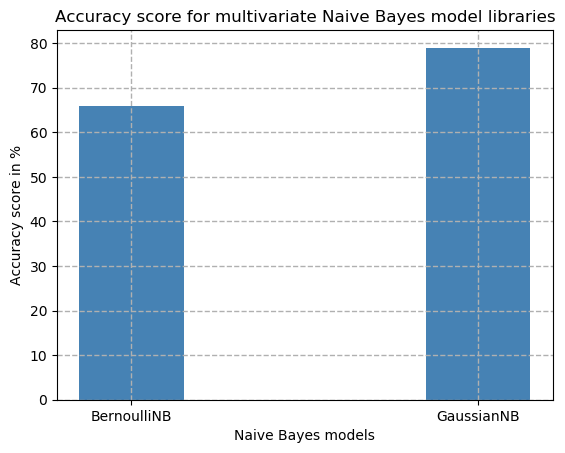

In [11]:
l = [bern_score*100,gausnb_score*100]
x = np.arange(len(l))
plt.bar(x+1,l,width = 0.3, color = 'steelblue')
plt.grid( linestyle='--', linewidth=1)
plt.xlabel('Naive Bayes models')
plt.ylabel('Accuracy score in %')
plt.xticks([1,2],['BernoulliNB','GaussianNB'])
plt.title('Accuracy score for multivariate Naive Bayes model libraries')
plt.yticks()
plt.style.use('default')
plt.show()

In [12]:
first_time_final = datetime.now() - first_time
print('Time elapsed in (hh:mm:ss.ms): "{}"'.format(first_time_final))

Time elapsed in (hh:mm:ss.ms): "0:00:10.108654"


### As we can see on our graphs, multinomial models take very less time time  then multivariative.
### Also accuracy score of multinomial models give much more accurate result.
### It is obvious that multinomial models are more effective and powerful for text classification.
### Especialy MultinomialNB model that gives the most effective results.